<a href="https://colab.research.google.com/github/ak7599/ML_diamond_price_prediction/blob/main/diamond_all_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we are going to build a model on diamond price prediction using some algorithms.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.shape

(53940, 10)

In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df.duplicated().sum()

146

In [ ]:
# drop the duplicate entities from df
df=df.drop_duplicates()
print(df.duplicated().sum())

0


In [ ]:
X=df.drop(['price'], axis=1)
y=df[['price']]

In [ ]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [ ]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [ ]:
num=X.select_dtypes(include=[np.number])
cat=X.select_dtypes(exclude=[np.number])

In [ ]:
num.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [ ]:
cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [ ]:
num.describe()

,carat,depth,table,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,10.740000,58.900000,31.800000


In [ ]:
# Clipping function below excludes the outliers present.
def outlier_cap(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return(x)

In [ ]:
num=num.apply(lambda x : outlier_cap(x))

In [ ]:
num.describe(percentiles=[0.01,0.05,0.1,0.15,0.25,0.5,0.75,0.9,1]).T

,count,mean,std,min,1%,5%,10%,15%,25%,50%,75%,90%,100%,max
carat,53794.0,0.795562,0.464987,0.24,0.24,0.30,0.31,0.32,0.40,0.70,1.04,1.51,2.18,2.18
depth,53794.0,61.744691,1.340372,57.90,57.90,59.30,60.00,60.50,61.00,61.80,62.50,63.30,65.60,65.60
table,53794.0,57.446609,2.173349,53.00,53.00,54.00,55.00,55.00,56.00,57.00,59.00,60.00,64.00,64.00
x,53794.0,5.729885,1.111137,4.02,4.02,4.29,4.36,4.42,4.71,5.70,6.54,7.30,8.35,8.35
y,53794.0,5.731981,1.103578,4.04,4.04,4.30,4.36,4.43,4.72,5.71,6.54,7.30,8.33,8.33
z,53794.0,3.537896,0.685907,2.48,2.48,2.65,2.69,2.73,2.91,3.53,4.03,4.52,5.15,5.15


In [ ]:
# The KBinsDiscretizer can then be used 
# to convert the floating values into fixed number of discrete categories with an ranked ordinal relationship
from sklearn.feature_selection import VarianceThreshold
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [ ]:
num_1

,carat,depth,table,x,y,z
0,0.24,61.5,55.0,4.02,4.04,2.48
1,0.24,59.8,61.0,4.02,4.04,2.48
2,0.24,57.9,64.0,4.05,4.07,2.48
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
num_binned = pd.DataFrame(discrete.fit_transform(num_1), index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned

,carat_Rank,depth_Rank,table_Rank,x_Rank,y_Rank,z_Rank
0,0.0,4.0,1.0,0.0,0.0,0.0
1,0.0,2.0,7.0,0.0,0.0,0.0
2,0.0,0.0,9.0,0.0,0.0,0.0
3,0.0,5.0,4.0,0.0,0.0,0.0
4,0.0,7.0,4.0,0.0,0.0,1.0
...,...,...,...,...,...,...
53935,2.0,3.0,3.0,3.0,4.0,3.0
53936,2.0,6.0,1.0,3.0,3.0,4.0
53937,2.0,6.0,6.0,3.0,3.0,4.0
53938,3.0,4.0,4.0,4.0,4.0,4.0


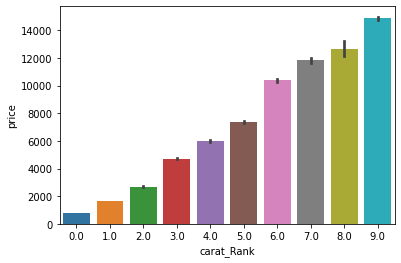

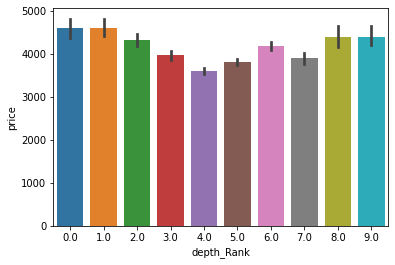

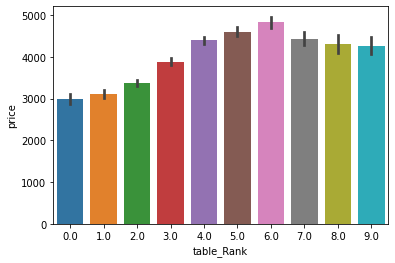

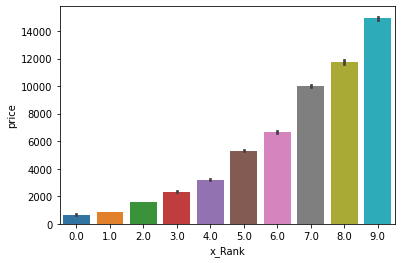

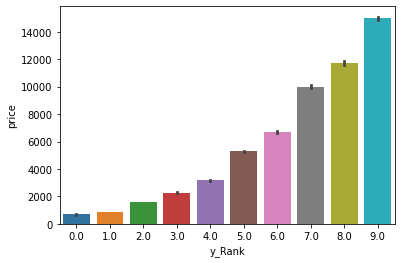

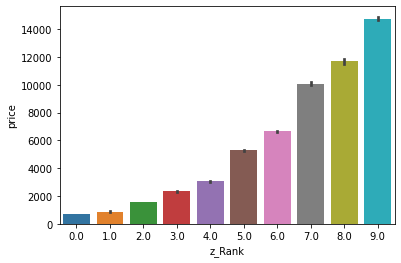

In [ ]:
from numpy import mean
Xbinned = pd.concat([y,num_binned], axis=1, join='inner')

for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x = col, y = 'price', data = Xbinned, estimator = mean)
plt.show()

In [ ]:
# In num_1 we dropped depth feature because from figure, 
# we can see there is not much slope to be seen as other columns. 
# Rest features show a good slope giving an intuition that those are having an good amount of effect on the target feature (i.e. price)

In [ ]:
num_1 = num_1.drop('depth', 1)
num_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,carat,table,x,y,z
0,0.24,55.0,4.02,4.04,2.48
1,0.24,61.0,4.02,4.04,2.48
2,0.24,64.0,4.05,4.07,2.48
3,0.29,58.0,4.20,4.23,2.63
4,0.31,58.0,4.34,4.35,2.75


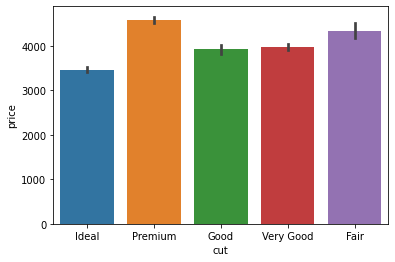

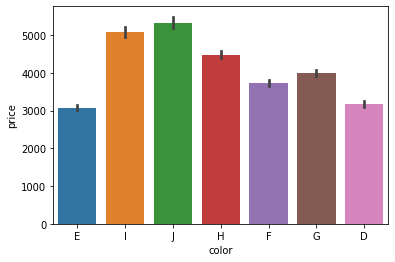

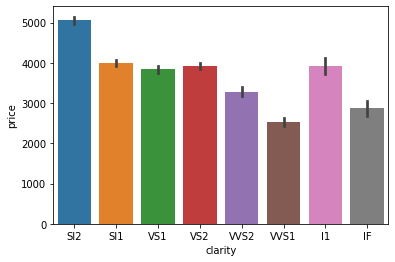

In [ ]:
Xchar = pd.concat([y,cat], axis=1, join='inner')

for col in (cat.columns):
    plt.figure()
    sns.barplot(x = col, y = 'price', data = Xchar, estimator = mean)
plt.show()

In [ ]:
X_char_dum = pd.get_dummies(cat, drop_first = True)
X_char_dum.shape

(53794, 17)

In [ ]:
X_char_dum.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selector = SelectKBest(chi2, k=15)
# Here we are using KBest to select best features out of all the categorical features. 
# Here, k = 15 denotes no of top features to be selected.

In [ ]:
selector.fit_transform(X_char_dum, y)


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
cols=selector.get_support(indices=True)
select_features_df_char=X_char_dum.iloc[:,cols]

In [ ]:
select_features_df_char.head()

,cut_Good,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
cat_1 = pd.DataFrame(select_features_df_char)
cat_1.shape

(53794, 15)

In [ ]:
Xall = pd.concat([num_1, cat_1], axis=1, join='inner')
Xall.head()

,carat,table,x,y,z,cut_Good,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.24,55.0,4.02,4.04,2.48,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.24,61.0,4.02,4.04,2.48,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.24,64.0,4.05,4.07,2.48,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,58.0,4.20,4.23,2.63,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,58.0,4.34,4.35,2.75,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
Xall.shape

(53794, 20)

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xall, y, test_size=0.2, random_state=101)

In [ ]:
print("Shape of Training Data",Xtrain.shape)
print("\nShape of Testing Data",Xtest.shape)
print("\nMean price in Training Data",Ytrain.mean())
print("\nMean price in Testing Data",Ytest.mean())

Shape of Training Data (43035, 20)

Shape of Testing Data (10759, 20)

Mean price in Training Data price    3933.958569
dtype: float64

Mean price in Testing Data price    3929.491217
dtype: float64


Making pipelines and fitting model.

In [ ]:
pipeline_lr=Pipeline([("lr_regressor",LinearRegression())])
pipeline_dt=Pipeline([("dt_regressor",DecisionTreeRegressor())])
pipeline_rf=Pipeline([("rf_regressor",RandomForestRegressor())])
pipeline_svm=Pipeline([("svm_regressor",SVR(kernel='rbf'))])
pipeline_kn=Pipeline([("kn_regressor",KNeighborsRegressor())])
pipeline_xgb=Pipeline([("xgb_regressor",XGBRegressor())])
pipelines=[pipeline_lr,pipeline_dt,pipeline_rf,pipeline_svm,pipeline_kn,pipeline_xgb]
pipe_dict={0:"LinearRegression", 1:"DecisionTree", 2:"RandomForest", 3:"SVMRegressor", 4:"KNN", 5:"XGBoost"}


In [ ]:
for pipe in pipelines:
  pipe.fit(Xtrain,Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18:08:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
for i, model in enumerate(pipelines):
    print(f'\n{pipe_dict[i]} Training Accuracy: {model.score(Xtrain,Ytrain)}')


LinearRegression Training Accuracy: 0.9280194017816433

DecisionTree Training Accuracy: 0.9991578743921723

RandomForest Training Accuracy: 0.9958428365362344

SVMRegressor Training Accuracy: -0.11282677118314455

KNN Training Accuracy: 0.9723810676139834

XGBoost Training Accuracy: 0.9552672547227252


In [ ]:
for i, model in enumerate(pipelines):
    print(f'\n{pipe_dict[i]} Test Accuracy: {model.score(Xtest,Ytest)}')


LinearRegression Test Accuracy: 0.9265250099911465

DecisionTree Test Accuracy: 0.9576716782978005

RandomForest Test Accuracy: 0.9728521072921583

SVMRegressor Test Accuracy: -0.11491688375173603

KNN Test Accuracy: 0.9563641259961351

XGBoost Test Accuracy: 0.9517271706666148


In [ ]:
best_accuracy=0.0
best_pipeline=''
best_classifier=0

# Best model with respect to accuracy
for i, model in enumerate(pipelines):
    if model.score(Xtest,Ytest)>best_accuracy:
        best_accuracy = model.score(Xtest, Ytest)
        best_pipeline = model
        best_classifier = i
print(f'Model with best accuracy: {pipe_dict[best_classifier]}')

Model with best accuracy: RandomForest


In [ ]:
# Prediction of each model
for i, model in enumerate(pipelines):
    print(f'\n{pipe_dict[i]} prediction: {model.predict(Xtest)}')


LinearRegression prediction: [[6601.26764206]
 [1894.89550334]
 [ 558.62526067]
 ...
 [3762.79369878]
 [-694.16261731]
 [2946.92516229]]

DecisionTree prediction: [7233. 1333.  776. ... 2980.  558. 2602.]

RandomForest prediction: [7456.3  1399.31  747.71 ... 3453.18  547.58 2733.65]

SVMRegressor prediction: [2448.73789034 2369.57554265 2329.45876863 ... 2421.31473876 2302.68126495
 2398.75889088]

KNN prediction: [[6174.4]
 [1412.8]
 [ 613.8]
 ...
 [3913.6]
 [ 506.6]
 [2472.2]]

XGBoost prediction: [6871.728   1608.1924   812.13196 ... 3293.5503   320.97687 2842.8916 ]


In [ ]:
# other metrices to find out best model
# R squared value of each model

for i, model in enumerate(pipelines):
    print(f"\nR^2 {pipe_dict[i]} :",metrics.r2_score(Ytest, model.predict(Xtest) ))


R^2 LinearRegression : 0.9265250099911465

R^2 DecisionTree : 0.9576716782978005

R^2 RandomForest : 0.9728521072921583

R^2 SVMRegressor : -0.11491688375173603

R^2 KNN : 0.9563641259961351

R^2 XGBoost : 0.9517271706666148


In [ ]:
# MAE 
for i, model in enumerate(pipelines):
    print(f"\nR^2 {pipe_dict[i]} :",metrics.mean_absolute_error(Ytest, model.predict(Xtest) ))


R^2 LinearRegression : 716.8572009212269

R^2 DecisionTree : 384.36842061956384

R^2 RandomForest : 301.27179282305013

R^2 SVMRegressor : 2733.32549189663

R^2 KNN : 415.0281810577191

R^2 XGBoost : 446.8317848636001


In [ ]:
# MSE
for i, model in enumerate(pipelines):
    print(f"\nR^2 {pipe_dict[i]} :",metrics.mean_squared_error(Ytest, model.predict(Xtest) ))


R^2 LinearRegression : 1147063.7663534642

R^2 DecisionTree : 660813.755936483

R^2 RandomForest : 423822.63752964494

R^2 SVMRegressor : 17405660.888055008

R^2 KNN : 681226.7681420207

R^2 XGBoost : 753617.1617174587


In [ ]:
# RMSE
for i, model in enumerate(pipelines):
    print(f"\nR^2 {pipe_dict[i]} :",np.sqrt(metrics.mean_squared_error(Ytest, model.predict(Xtest) )))



R^2 LinearRegression : 1071.0106284969652

R^2 DecisionTree : 812.9045183393207

R^2 RandomForest : 651.0166184742483

R^2 SVMRegressor : 4172.009214761517

R^2 KNN : 825.3646273872056

R^2 XGBoost : 868.1112611396414



# Conclusion


# Diamond price prediction is a regression problem

# Testing Accuracy is maximum for XGBoost model with accuracy 97.65%.
# Other metrics such as R2 , Mean Absolute Error, Mean Squared Error, Root Mean Squared Error confirm that XGBoost is indeed optimum than that of other models.